# Исследование прибыли сервиса аренды самокатов GoFast
В нашем распоряжении данные о некоторых пользователях популярного сервиса аренды самокатов GoFast из нескольких городов, а также данные об их поездках. Была поставлена задача проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти. 

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
* без подписки
  * абонентская плата отсутствует;
  * стоимость одной минуты поездки — 8 рублей;
  * стоимость старта (начала поездки) — 50 рублей;
* с подпиской Ultra
  * абонентская плата — 199 рублей в месяц;
  * стоимость одной минуты поездки — 6 рублей;
  * стоимость старта — бесплатно.

В основных данных есть информация о пользователях, их поездках и подписках. Вся эта информация представлена в виде 3-х отдельных cvs таблиц.

**План исследования**:
1. Изучение общей информации о cvs таблицах с данными.

2. Предобработка данных: 
 - изменение типа данных столбца `date`; 
 - создание нового столбца с номером месяца на основе столбца `date`;
 - проверка наличия пропущенных значений и дубликатов в датафреймах и их обработка там, где это необходимо.

3. Исследовательский анализ данных.
Описание и визуализация общей информации о пользователях и поездках:
* частота встречаемости городов;
* соотношение пользователей с подпиской и без подписки;
* возраст пользователей;
* расстояние, которое пользователь преодолел за одну поездку;
* продолжительность поездок.

4. Объединение данных.
* объединение данных о пользователях, поездках и подписках в одну таблицу.
* создание еще 2 таблиц с информацией: 
  * о пользователях без подписки
  * о пользователях с подпиской.
* визуализация данных о расстоянии и времени поездок для пользователей обеих категорий.

5. Подсчёт выручки.
* создание таблицы с агрегированными данными о поездках на основе таблицы с объединёнными данными из шага 4: нахождение суммарного расстояния, количества поездок и суммарного времени для каждого пользователя за каждый месяц.
* добавление в этот же датафрейм столбец с помесячной выручкой, которую принёс каждый пользователь. 

6. Проверка гипотез.
* Гипотеза 1: Пользователи с подпиской тратят больше времени на поездки.
* Гипотеза 2: Среднее расстояние, которое проезжают пользователи с подпиской за 1 поездку не превышает 3130 метров.
* Гипотеза 3: Помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки.

7. Общий вывод о проделанном исследовании.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

#### Шаг 1. Загрузка данных

In [2]:
#выведем первые строки каждого набора данных
data_users = pd.read_csv(r'C:\Users\nadya\OneDrive\Desktop\yandex_practicum\GoFast\users_go.csv')
data_users.head(20)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
#выведем основную информацию data_users
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В данных data_users нет пропусков, названия столбцов правильно обозначены, однако тип данных в столбце `user_id` указан не верно. С данными типа int можно совершать математические операции (сложение, вычитание, умножение, деление и проч.), а id пользователя в данном случае просто служит для того, чтобы отличить пользователя от других пользователей, например, с таким же именем, того же возраста. Оставим столбец пока таким, изменим тип данных в нем позже, если это понадобится.

In [4]:
data_rides = pd.read_csv(r'C:\Users\nadya\OneDrive\Desktop\yandex_practicum\GoFast\rides_go.csv')
data_rides.head(20)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В data_rides пропуски также отсутствуют, но в столбце `date` тип данных указан неверно - *object*. Для записи дат есть свой формат - *datatime*. Тип данных в столбце `user_id` так же, как и в data_users указан как *int*, что неверно, поскольку в данном случае это должно быть *object*.

In [6]:
data_subscriptions = pd.read_csv(r'C:\Users\nadya\OneDrive\Desktop\yandex_practicum\GoFast\subscriptions_go.csv')
data_subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


С данными data_subscriptions тоже все в порядке, пропусков нет. Тип данных указан верно.

#### Шаг 2. Предобработка данных

In [8]:
#в столбце date датафрейма data_rides заменим тип данных на datatime
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [9]:
#добавим столбец month в датафрейм data_rides с номером месяца
data_rides['month'] = data_rides['date'].dt.month
data_rides

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


In [10]:
#проверим наличие дубликатов во всех датафреймах
data_users.duplicated().sum()

31

In [11]:
#удалим дубликаты
data_users = data_users.drop_duplicates().reset_index(drop=True)
data_users.duplicated().sum()

0

In [12]:
#посмотрим есть ли дубликаты в data_rides
data_rides.duplicated().sum()

0

In [13]:
#посмотрим есть ли дубликаты в data_subscriptions
data_subscriptions.duplicated().sum()

0

Вывод: в датафрейме data_rides в столбце `date` тип данных был изменен. Пропуски во всех 3 датафреймах отсутствуют. Дубликаты были обнаружены только в датафрейме data_users, их немного, они были удалены.

#### Шаг 3. Исследовательский анализ данных

Теперь опишем и визуализируем общую информацию о пользователях и поездках:
* частота встречаемости городов;
* соотношение пользователей с подпиской и без подписки;
* возраст пользователей;
* расстояние, которое пользователь преодолел за одну поездку;
* продолжительность поездок.

In [14]:
#изучим частоту встречаемости городов
data_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

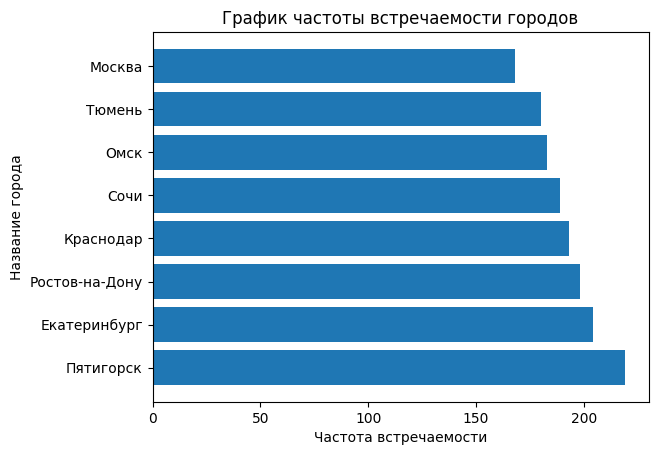

In [15]:
#построим график распределений пользователей по городам
x = ['Пятигорск', 'Екатеринбург', 'Ростов-на-Дону', 'Краснодар', 'Сочи', 'Омск', 'Тюмень', 'Москва']
y = [219, 204, 198, 193, 189, 183, 180, 168]
plt.barh(x, y)
plt.title('График частоты встречаемости городов')
plt.xlabel('Частота встречаемости')
plt.ylabel('Название города')
plt.show()

В датафрейме чаще всего встречается город Пятигорск, и, наоборот, реже всего Москва.

In [16]:
#посмотрим соотношение пользователей с подпиской и без
data_users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

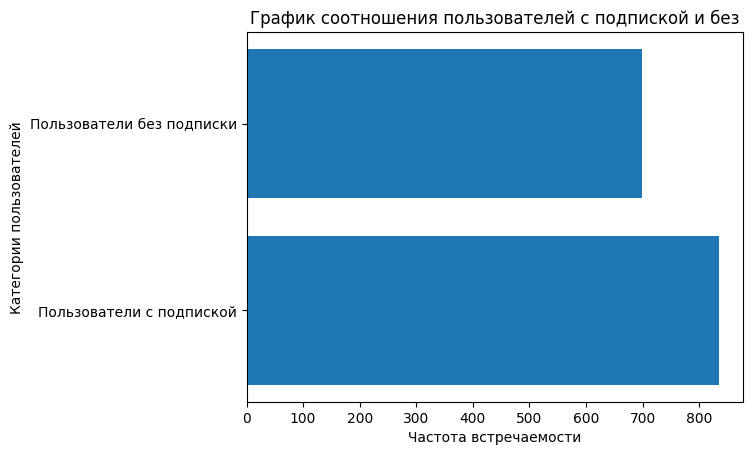

In [17]:
#построим график соотношения пользователей с подпиской и без
x = ['Пользователи с подпиской', 'Пользователи без подписки']
y = [835, 699]
plt.barh(x, y)
plt.title('График соотношения пользователей с подпиской и без')
plt.xlabel('Частота встречаемости')
plt.ylabel('Категории пользователей')
plt.show()

Как оказалось, пользователей без подписки больше на 136 человек.

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

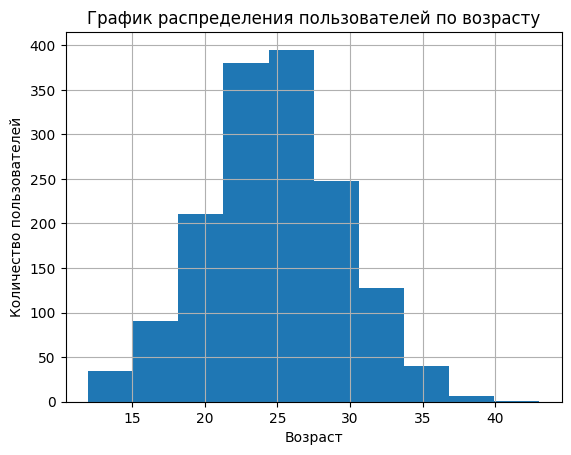

In [18]:
#изучим возраст подпсичиков
data_users['age'].plot(title='График распределения пользователей по возрасту', kind='hist', grid=True)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

data_users['age'].describe()

Интересно, что максимальный возраст подписчиков - 43 года. Минимальный же - 12 лет. Можно сказать, что у сервиса больше всего подписчиков в возрасте 25 лет. Распределение пользователей по возрасту нормальное.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

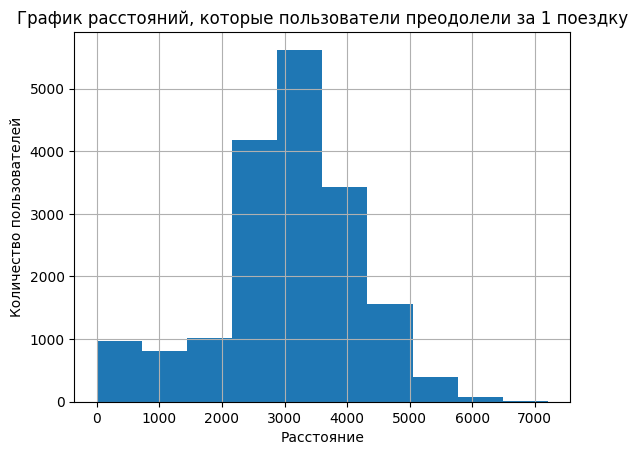

In [19]:
#изучим расстояние, которое пользователь преодолел за одну поездку
data_rides['distance'].plot(title='График расстояний, которые пользователи преодолели за 1 поездку', kind='hist', grid=True)
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')

data_rides['distance'].describe()

Минимальное расстояние, которое пользователь проехал в текущей сессии, составляет меньше 1 км. Максимальное - чуть больше 7 км. В среднем пользователи преодолевают на самокате около 3 км. Распределение значений расстояний, которые пользователи преодолели за 1 поездку, тоже можно назвать нормальным.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

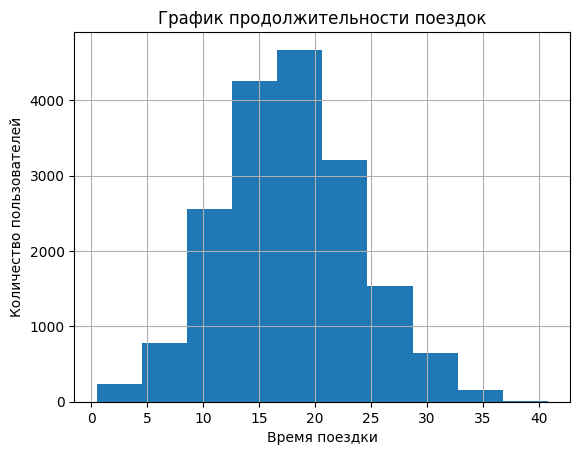

In [20]:
#изучим продолжительность поездок
data_rides['duration'].plot(title='График продолжительности поездок', kind='hist', grid=True)
plt.xlabel('Время поездки')
plt.ylabel('Количество пользователей')

data_rides['duration'].describe()

In [21]:
#посмотрим какие расстояния проезжают пользователи, длительность поездок которых составляет меньше 5 минут
#для этого выведем срез данных
data_rides.query('duration <= 5')

,user_id,distance,duration,date,month
280,29,824.495470,4.832212,2021-11-21,11
406,44,504.654111,4.513962,2021-01-25,1
1450,157,935.054928,4.934596,2021-10-03,10
1843,199,606.203843,4.347120,2021-03-27,3
2125,227,618.389251,4.855168,2021-06-22,6
...,...,...,...,...,...
17802,1516,393.696926,2.874882,2021-07-28,7
17839,1519,1221.602398,4.931846,2021-06-04,6
17909,1524,4103.998874,0.500000,2021-06-18,6
17924,1525,381.313695,4.089468,2021-08-25,8


Значения расстояний поездок длительностью 5 минут и меньше довольно разнятся. Например, есть расстояние поездки 504 м, которое было преодолено пользователем за почти 5 минут, а есть расстояние поездки 4103 м, которое было преодолено пользователем меньше, чем за минуту. Но это скорее вопрос про среднюю скорость, за которую то или иное расстояние было преодолено пользователями.

Минимальное время, в течение которого пользовались самокатом, составляет меньше минуты. Похоже, это тот пользователь, расстояние поездки которого составило меньше километра. Можно предположить, что он передумал пользоваться самокатом и сразу же завершил поездку, либо в приложении возникла ошибка и поездка была завершена и проч. Максимальное время использования самоката - 40 минут. В среднем поездка пользователей составляет 18 минут. Распределение значений времени нормальное.

#### Шаг 4. Объединение данных

In [22]:
#объединим данные о пользователях, поездках и подписчиках в 1 датафрейм и сделаем это в 2 шага
#сначала объединим датафрейм с информацией о пользователях и их поездках. Пусть data_users будет основным датафреймом
merged_data = data_users.merge(data_rides, on='user_id', how='left')
merged_data

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


In [23]:
#проверим, нет ли в merged_data пропусков
merged_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
dtype: int64

После объединения датафреймов с информацией о пользователях и их поездках пропусков не возникло. Идем дальше.

In [24]:
#теперь к получившемуся датафрейму добавим еще датафрейм с подписками пользователей
full_data = merged_data.merge(data_subscriptions, on='subscription_type', how='left')
full_data.head(30)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [25]:
#проверим, не появились ли в full_data пропусков
full_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Теперь информация 3-х датафреймов содержится в 1 датафрейме. Пропусков нет, значит датафреймы объединились успешно.

In [26]:
#отдельно создадим из full_data датафрейм ultra_users, в котором будет вся информация о пользователях с подпиской ultra
ultra_users = full_data.loc[ full_data['subscription_type'] == 'ultra']
ultra_users

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


In [27]:
#проверим, нет ли в ultra_users пропусков
ultra_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков нет, с данными все в порядке.

In [28]:
#отдельно создадим из full_data датафрейм free_users, в котором будет вся информация о пользователях без подписки
free_users = full_data.loc[ full_data['subscription_type'] == 'free']
free_users

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [29]:
#проверим, нет ли в free_users пропусков
free_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков нет, с данными все в порядке.

Вывод: Теперь у нас есть датафрейм full_data, содержащий всю информацию о пользователях, их поездках и подписках. Есть также 2 датафрейма, содержащих информацию о пользователях с подпиской (ultra_users) и без (free_users), соответственно. Похоже, в full_data сначала были записаны пользователи с подпиской (вплоть до 6499 строки), а потом уже пользователи без нее (начиная со строки 6500).

Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

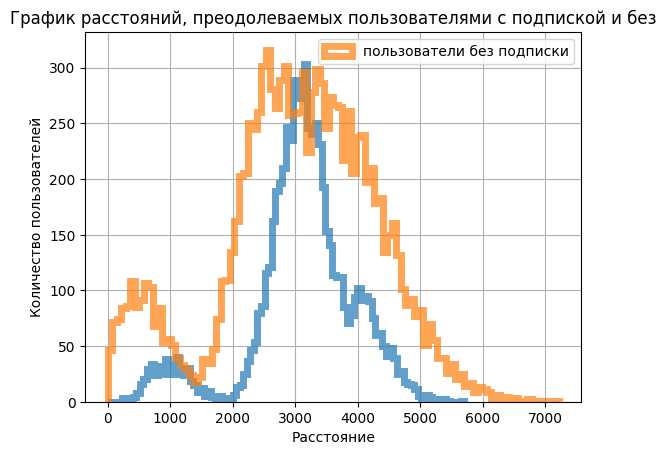

In [30]:
#построим гистограмму расстояний, преодолеваемых пользователями с подпиской и без
ax = ultra_users['distance'].plot(
    title='График расстояний, преодолеваемых пользователями с подпиской и без',
    kind='hist',
    histtype='step',
    range=(0, 5701),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='пользователи с подпиской',
)
free_users['distance'].plot(
    kind='hist',
    histtype='step',
    range=(0, 7212),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='пользователи без подписки',
    ax=ax,
    grid=True,
    legend=True,
)
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.show()

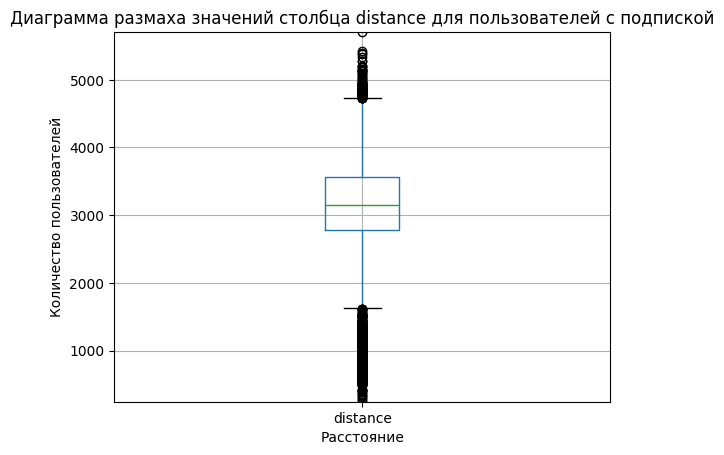

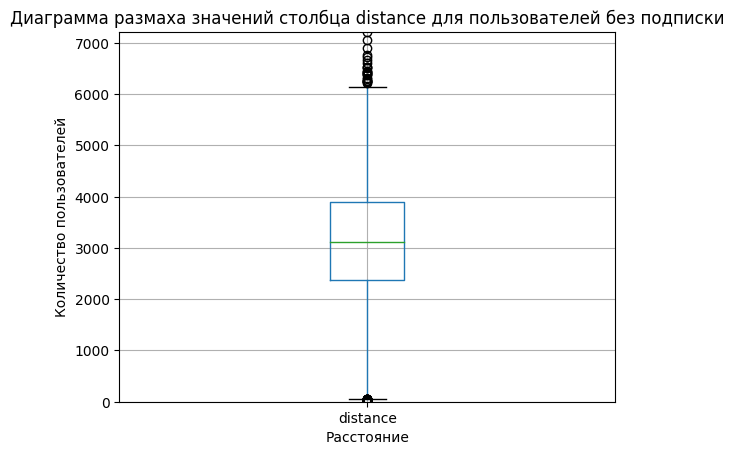

In [31]:
#посмотрим диаграмму размаха значений столбца distance для пользователей с подпиской
plt.ylim(244, 5701)
ultra_users.boxplot(column='distance')
plt.title('Диаграмма размаха значений столбца distance для пользователей с подпиской')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.show()

#посмотрим диаграмму размаха значений столбца distance для пользователей без подписки
plt.ylim(0, 7212)
free_users.boxplot(column='distance')
plt.title('Диаграмма размаха значений столбца distance для пользователей без подписки')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.show()

In [32]:
#выведем более подробную информацию по столбцу distance для пользователей с подпиской
ultra_users['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Распределение значений пользователей с подпиской получилось более-менее нормальное, есть выбросы, но не будем их трогать. Минимальное расстояние, которое преодолевают пользователи с подпиской составляет 244 м, а максимальное - 5700 м. Чаще всего пользователи данной категории преодолевают расстояние чуть больше 3 км (около 3148 м).

In [33]:
##выведем более подробную информацию по столбцу distance для пользователей без подписки
free_users['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

В распределении значений пользователей без подписки уже меньше выбросов, чем среди значений пользователей с подпиской. Минимальное расстояние поездки пользователей данной категории составило меньше метра, максимальное 7211 м. Интересно, что максимальное расстояние пользователей без подписки оказалось больше максимального расстояния пользователей с подпиской. Так же, как и пользователи с подпиской, пользователи без нее очень часто совершают поездки, составляющие чуть больше 3 км (3114 м).

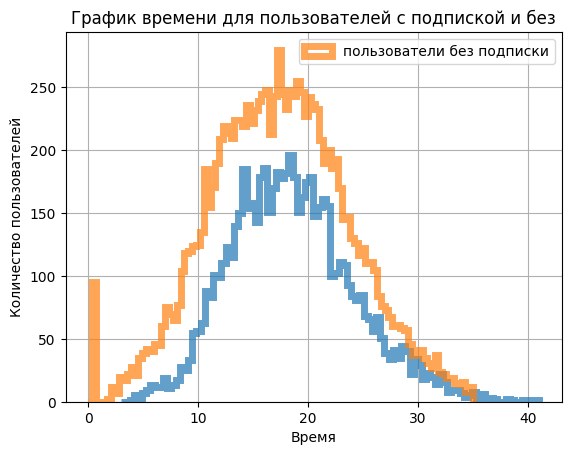

In [34]:
#построим гистограмму времени для пользователей с подпиской и без
ax = ultra_users['duration'].plot(
    title='График времени для пользователей с подпиской и без',
    kind='hist',
    histtype='step',
    range=(3, 41),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='пользователи с подпиской',
)
free_users['duration'].plot(
    kind='hist',
    histtype='step',
    range=(0, 35),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='пользователи без подписки',
    ax=ax,
    grid=True,
    legend=True,
)
plt.xlabel('Время')
plt.ylabel('Количество пользователей')
plt.show()

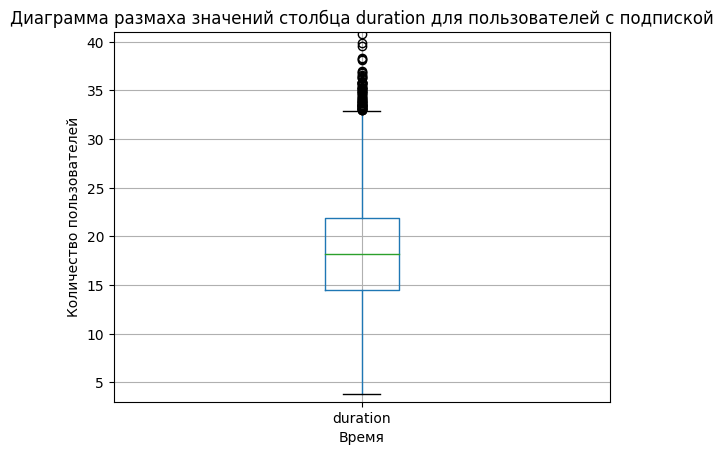

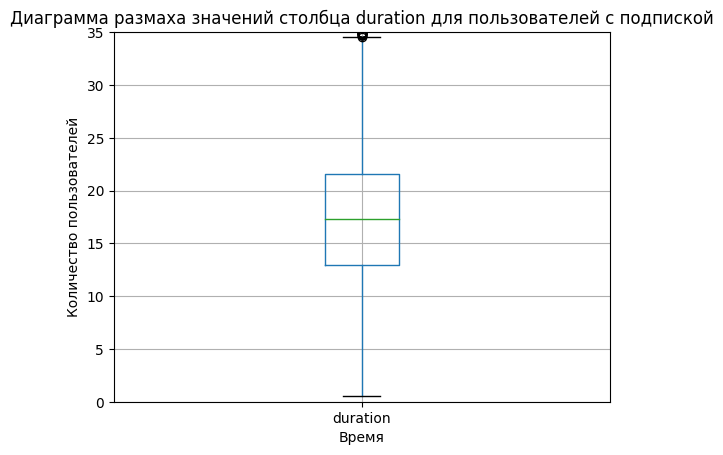

In [35]:
#посмотрим диаграмму размаха значений столбца duration для пользователей с подпиской
plt.ylim(3, 41)
ultra_users.boxplot(column='duration')
plt.title('Диаграмма размаха значений столбца duration для пользователей с подпиской')
plt.xlabel('Время')
plt.ylabel('Количество пользователей')
plt.show()

#посмотрим диаграмму размаха значений столбца duration для пользователей без подписки
plt.ylim(0, 35)
free_users.boxplot(column='duration')
plt.title('Диаграмма размаха значений столбца duration для пользователей с подпиской')
plt.xlabel('Время')
plt.ylabel('Количество пользователей')
plt.show()

In [36]:
#выведем более подробную информацию по столбцу duration для пользователей с подпиской
ultra_users['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

График распределения времени для пользователей с подпиской получился нормальным, выбросы есть, не будем их трогать. Минимальное время использования самоката подписчиками сервиса - около 4 минут, максимальное же - почти 41 минута. Чаще всего подписчики совершают поездки длительностью в 18 минут. 

In [37]:
#выведем более подробную информацию по столбцу duration для пользователей без подписки
free_users['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

График распределения времени для пользователей без подписки нормальный, но есть выбросы. Минимальное время использования самоката составило меньше минуты. Возможно, пользователь просто передумал ехать на самокате и завершил поездку сразу же, и, по всей видимости, как раз этот же пользователь не успел проехать больше метра (*min* значение столбца `distance` датафрейма free_users). Максимальное время по выборке составило почти 35 минут, что на 6 минут меньше, чем максимальное время использования самоката каким-нибудь подписчиком сервиса.

#### Шаг 5. Подсчёт выручки

In [38]:
#создадим сводную таблицу с данными о суммарном расстоянии, 
#о количестве поездок, о суммарном времени и о стоимости старта поездки для пользователей сервиса

data_pivot = full_data.pivot_table(index=['user_id', 'subscription_type', 'month'], \
                                   values=['duration', 'distance', 'name', 'start_ride_price'], \
                                   aggfunc={'distance':'sum', 'duration':'sum', 'name':'count', 'start_ride_price':'max'})

#переименуем столбцы
data_pivot = data_pivot.rename(columns={'name': 'total_rides', 'duration': 'total_duration', 'distance': 'total_distance'})

#округлим длительность каждой поездки
data_pivot['total_duration'] = np.ceil(data_pivot['total_duration'])
data_pivot

total_distance  total_duration  total_rides  \
user_id subscription_type month                                                
1       ultra             1         7027.511294            42.0            2   
                          4          754.159807             7.0            1   
                          8         6723.470560            45.0            2   
                          10        5809.911100            32.0            2   
                          11        7003.499363            54.0            3   
...                                         ...             ...          ...   
1534    free              6         3409.468534            25.0            2   
                          8         7622.453034            48.0            2   
                          9         4928.173852            23.0            1   
                          11       13350.015305            77.0            4   
                          12        2371.711192            16.0            1   

                                 start_ride_price  
user_id subscription_type month                    
1       ultra             1                     0  
                          4                     0  
                          8                     0  
                          10                    0  
                          11                    0  
...                                           ...  
1534    free              6                    50  
                          8                    50  
                          9                    50  
                          11                   50  
                          12                   50  

[11331 rows x 4 columns]

In [39]:
#добавим в сводную таблицу столбец monthly_revenue с помесячной выручкой, которую принес каждый пользователь,
#для этого напишем сначала функцию, которая рассчитает формулу: 
#start_ride_price * total_rides + minute_price * total_duration + subscription_fee

def itog_cost(row):
    total_rides = row['total_rides']
    total_duration = row['total_duration']
    start_ride_price = row['start_ride_price']
    if start_ride_price == 0:
        return 6 * total_duration + 199
    return total_rides * 50 + 8 * total_duration

In [40]:
#создаем столбец monthly_revenue и применяем к нему функцию cost

data_pivot['monthly_revenue'] = data_pivot.apply(itog_cost, axis=1)
data_pivot.head(20)

total_distance  total_duration  total_rides  \
user_id subscription_type month                                                
1       ultra             1         7027.511294            42.0            2   
                          4          754.159807             7.0            1   
                          8         6723.470560            45.0            2   
                          10        5809.911100            32.0            2   
                          11        7003.499363            54.0            3   
                          12        6751.629942            28.0            2   
2       ultra             3        10187.723006            61.0            3   
                          4         6164.381824            40.0            2   
                          6         3255.338202            14.0            1   
                          7         6780.722964            47.0            2   
                          8          923.007439             7.0            1   
                          10        2824.636598            19.0            1   
                          12        3828.248580            12.0            1   
3       ultra             1         3061.777147            13.0            1   
                          2         5421.152016            38.0            2   
                          4         2956.651632            21.0            1   
                          5         9064.026918            62.0            3   
                          7        10919.595403            66.0            3   
                          9         2891.012822            23.0            1   
                          12        2593.381928            13.0            1   

                                 start_ride_price  monthly_revenue  
user_id subscription_type month                                     
1       ultra             1                     0            451.0  
                          4                     0            241.0  
                          8                     0            469.0  
                          10                    0            391.0  
                          11                    0            523.0  
                          12                    0            367.0  
2       ultra             3                     0            565.0  
                          4                     0            439.0  
                          6                     0            283.0  
                          7                     0            481.0  
                          8                     0            241.0  
                          10                    0            313.0  
                          12                    0            271.0  
3       ultra             1                     0            277.0  
                          2                     0            427.0  
                          4                     0            325.0  
                          5                     0            571.0  
                          7                     0            595.0  
                          9                     0            337.0  
                          12                    0            277.0

#### Шаг 6. Проверка гипотез

В рамках данного исследования необходимо проверить следующие гипотезы:

**Гипотеза 1**: Пользователи с подпиской тратят больше времени на поездки.

**Гипотеза 2**: Среднее расстояние, которое проезжают пользователи с подпиской за 1 поездку не превышает 3130 метров.

**Гипотеза 3**: Помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки.

**Гипотеза 4 (возможная)**: После обновления серверов, с которыми взаимодействует мобильное приложение, количество обращений в техподдержку значимо снизилось.

Обратимся для начала к **первой гипотезе** о том, что пользователи с подпиской тратят больше времени на поездки. У нас есть 2 независимые выборки разного размера (пользователи с подпиской и без). Соответственно, предположим, что их дисперсии не равны.

H0: Среднее время поездки пользователей с подпиской = среднему времени поездки пользователей без подписки.

Н1: Среднее время поездки пользователей с подпиской > среднего времени поездки пользователей без подписки.

In [41]:
#для проверки гипотезы используем метод scipy.stats.ttest_ind
#возьмем исходные данные о продолжительности каждой сессии отдельно из ultra_users и free_users
#и превратим их в списки значений

duration_ultra = ultra_users['duration'].tolist()
duration_free = free_users['duration'].tolist()

alpha = 0.05
results = st.ttest_ind(duration_ultra, duration_free, equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.675781377128977e-37
Отвергаем нулевую гипотезу


Вывод: нулевая гипотеза была отвергнута. Следовательно, пользователи с подпиской действительно тратят в сервисе больше денег.

**Вторая гипотеза** гласит о том, что среднее расстояние, которое проезжают *пользователи с подпиской* за 1 поездку не превышает 3130 метров. Гипотезу необходимо проверить на 1 выборке - это пользователи с подпиской.

Н0: Среднее расстояние поездки пользователей по подписке = 3130 м.

Н1: Среднее расстояние поездки пользователей по подписке > 3130 м.

In [42]:
#для проверки гипотезы используем метод scipy.stats.ttest_1samp
#возьмем исходные данные о расстояниях, преодолеваемых подписчиками сервиса из ultra_users
#и превратим их в список значений

distance_ultra = ultra_users['distance'].tolist()
optimal_value = 3130

alpha = 0.05
results = st.ttest_1samp(distance_ultra, optimal_value, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Вывод: нулевая гипотеза не отвергнута. Значит среднее расстояние, которое проезжают пользователи с подпиской за 1 поездку не превышает 3130 метров.

Проверим **третью гипотезу** о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки. Гипотезу необходимо проверить на двух независимых выборках разного размера.

H0: Помесячная выручка от пользователей с подпиской по месяцам = помесячной выручке от пользователей без подписки по месяцам.

H1: Помесячная выручка от пользователей с подпиской по месяцам > помесячной выручке от пользователей без подписки по месяцам.


In [44]:
#из таблицы data_pivot создадим отдельные датафреймы по пользователям с подпиской и без,
#взяв исходные данные о стоимости начала поездки 
ultra_pivot = data_pivot.loc[data_pivot['start_ride_price'] == 0].copy()
ultra_pivot

total_distance  total_duration  total_rides  \
user_id subscription_type month                                                
1       ultra             1         7027.511294            42.0            2   
                          4          754.159807             7.0            1   
                          8         6723.470560            45.0            2   
                          10        5809.911100            32.0            2   
                          11        7003.499363            54.0            3   
...                                         ...             ...          ...   
699     ultra             6         4072.797406            17.0            1   
                          8         7018.324143            45.0            2   
                          9         6364.861911            31.0            2   
                          10        4707.845501            16.0            1   
                          12        3202.890770            26.0            1   

                                 start_ride_price  monthly_revenue  
user_id subscription_type month                                     
1       ultra             1                     0            451.0  
                          4                     0            241.0  
                          8                     0            469.0  
                          10                    0            391.0  
                          11                    0            523.0  
...                                           ...              ...  
699     ultra             6                     0            301.0  
                          8                     0            469.0  
                          9                     0            385.0  
                          10                    0            295.0  
                          12                    0            355.0  

[4533 rows x 5 columns]

In [45]:
free_pivot = data_pivot.loc[data_pivot['start_ride_price'] == 50].copy()
free_pivot

total_distance  total_duration  total_rides  \
user_id subscription_type month                                                
700     free              1         2515.690719            15.0            1   
                          2        13446.659764            86.0            5   
                          3         3798.334905            19.0            1   
                          4         2984.551206            16.0            1   
                          6         5927.650988            29.0            2   
...                                         ...             ...          ...   
1534    free              6         3409.468534            25.0            2   
                          8         7622.453034            48.0            2   
                          9         4928.173852            23.0            1   
                          11       13350.015305            77.0            4   
                          12        2371.711192            16.0            1   

                                 start_ride_price  monthly_revenue  
user_id subscription_type month                                     
700     free              1                    50            170.0  
                          2                    50            938.0  
                          3                    50            202.0  
                          4                    50            178.0  
                          6                    50            332.0  
...                                           ...              ...  
1534    free              6                    50            300.0  
                          8                    50            484.0  
                          9                    50            234.0  
                          11                   50            816.0  
                          12                   50            178.0  

[6798 rows x 5 columns]

In [46]:
#для проверки гипотезы используем метод scipy.stats.ttest_ind
#превратим значения столбцов monthly_revenue в списки значений

ultra_revenue = ultra_pivot['monthly_revenue'].tolist()
free_revenue = free_pivot['monthly_revenue'].tolist()

alpha = 0.05
results = st.ttest_ind(ultra_revenue, free_revenue, equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.0718729651261336e-44
Отвергаем нулевую гипотезу


Вывод: нулевая гипотеза была отвергнута. Получается, помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки.

Если бы возникла ситуация, когда техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение, и был бы некоторый файл, содержащий для каждого пользователя данные о количестве обращений до обновления и после него, **можно было бы проверить еще одну гипотезу** о том, что после обновления серверов, с которыми взаимодействует мобильное приложение, количество обращений в техподдержку значимо снизилось. Нам понадобилось бы применение метода `scipy.ttest_rel` для проверки этой гипотезы (с аргументом alternative='less'), поскольку гипотеза проверялась бы на двух зависимых выборках (до обновления сервера и после).

#### Общий вывод

В рамках этого исследования были проанализированы данные 3-х csv таблиц, содержащих информацию о пользователях, их поездках и подписках.

**Цель исследования** состояла в проверке следующих гипотез:
* Гипотеза 1: Пользователи с подпиской тратят больше времени на поездки.
* Гипотеза 2: Среднее расстояние, которое проезжают пользователи с подпиской за 1 поездку не превышает 3130 метров.
* Гипотеза 3: Помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки.

#### Этап 1. Изучение и предварительная обработка данных

На этапе предобработки были произведены: 
- изменение типа данных; 
- создание нового столбца с номером месяца на основе столбца `date`;
- проверка данных на наличие пропущенных значений и дубликатов, и их обработка там, где это необходимо.


Итог по каждой cvs таблице:
1. В данных data_users нет пропусков, названия столбцов правильно обозначены, однако тип данных в столбце `user_id` указан не верно, но было принято решение оставить его как есть, поскольку изменение типа данных не потребовалось на дальнейших этапах анализа. Были обнаружены дубликаты, их немного (31 штука), они были удалены.

2. В data_rides пропуски также отсутствуют, но в столбце `date` тип данных указан неверно, поскольку для записи дат есть свой формат - *datatime*. Это было изменено. Помимо этого было проведено изменение типа данных в столбце user_id. Для удобства дальнейшего исследовательского анализа, в эту таблицу был добавлен столбец `month`, который содержал информацию о номере месяца, в который поездка была совершена. Дубликаты не были обнаружены.

3. С данными data_subscriptions все в порядке, пропусков нет. Тип данных везде указан верно. Дубликаты не были обнаружены.


#### Этап 2. Исследовательский анализ данных

На этом этапе была описана и визуализирована общая информация о пользователях и поездках:

* частота встречаемости городов;

Больше всего оказалось информации о пользователях города Пятигорск, и, наоборот, меньше всего о пользователях из Москвы.

* соотношение пользователей с подпиской и без подписки;

Как оказалось, пользователей без подписки больше на 136 человек.

* возраст пользователей;

Максимальный возраст подписчиков составил 43 года. Минимальный же - 12 лет. Можно утверждать, что у сервиса больше всего подписчиков в возрасте 25 лет. 

* расстояние, которое пользователь преодолел за одну поездку;

Минимальное расстояние, которое пользователь преодолевал на самокате, оказалось меньше 1 км. Максимальное - чуть больше 7 км. В среднем пользователи проезжают около 3 км. 

* продолжительность поездок.

Минимальное время, в течение которого пользовались самокатом, составляет меньше минуты. Можно предположить, что это тот же пользователь, расстояние поездки которого составило меньше километра. Веротятно, он передумал пользоваться самокатом и сразу же завершил поездку, либо в приложении возникла ошибка и поездка была завершена и проч. Максимальное время использования самоката - 40 минут. В среднем поездка пользователей составляет 18 минут. 


#### Этап 3. Объединение данных

Данные всех 3-х csv таблиц были объединены в одну таблицу. Также для последующего удобства проверки гипотез были созданы еще 2 таблицы, содержащие всю информацию отдельно о пользователях с подпиской и без.

На основе этих таблиц была визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий.

***Для пользователей с подпиской***: 
Минимальное расстояние, которое они преодолевают составило 244 м, а максимальное - 5700 м. В целом, чаще всего пользователи данной категории преодолевают расстояние чуть больше 3 км (около 3148 м).

Минимальное время использования самоката подписчиками сервиса - около 4 минут, максимальное же - почти 41 минута. Чаще всего подписчики совершают поездки длительностью в 18 минут.

***Для пользователей без подписки***: 
Минимальное расстояние поездки составило меньше метра, максимальное 7211 м. Интересно, что максимальное расстояние пользователей без подписки оказалось больше максимального расстояния пользователей с подпиской. Так же, как и пользователи с подпиской, пользователи без нее очень часто совершают поездки, составляющие чуть больше 3 км (3114 м).

Минимальное время использования самоката составило меньше минуты. Возможно, пользователь просто передумал ехать на самокате и завершил поездку сразу же, и, по всей видимости, как раз этот же пользователь не успел проехать больше метра (min значение столбца `distance` датафрейма free_users). Максимальное время по выборке составило почти 35 минут, что на 6 минут меньше, чем максимальное время использования самоката каким-нибудь подписчиком сервиса.


#### Этап 4. Подсчёт выручки

Для дальнейшей проверки гипотез была создана сводная таблица с информацией о суммарном расстоянии, количестве поездок и суммарном времени для каждого пользователя за каждый месяц. В эту же таблицу был добавлен столбец с помесячной выручкой, которую принес каждый пользователь.


#### Этап 5. Проверка гипотез

Гипотеза 1 о том, что пользователи с подпиской тратят больше времени на поездки **подтвердилась**.

Гипотеза 2 о том, что среднее расстояние, которое проезжают пользователи с подпиской за 1 поездку не превышает 3130 метров **подтвердилась**.

Гипотеза 3 о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки **подтвердилась**.